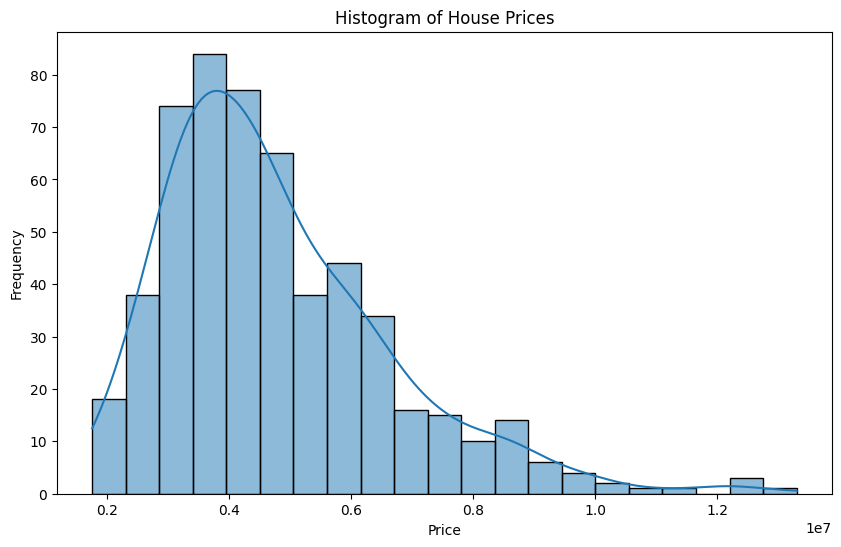

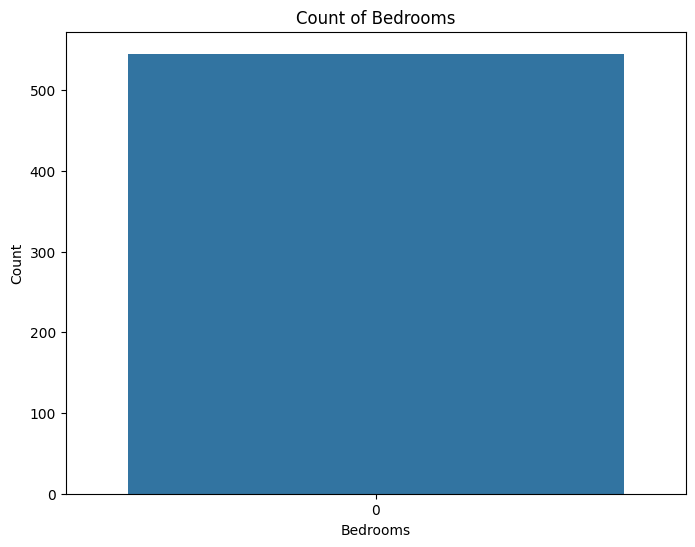

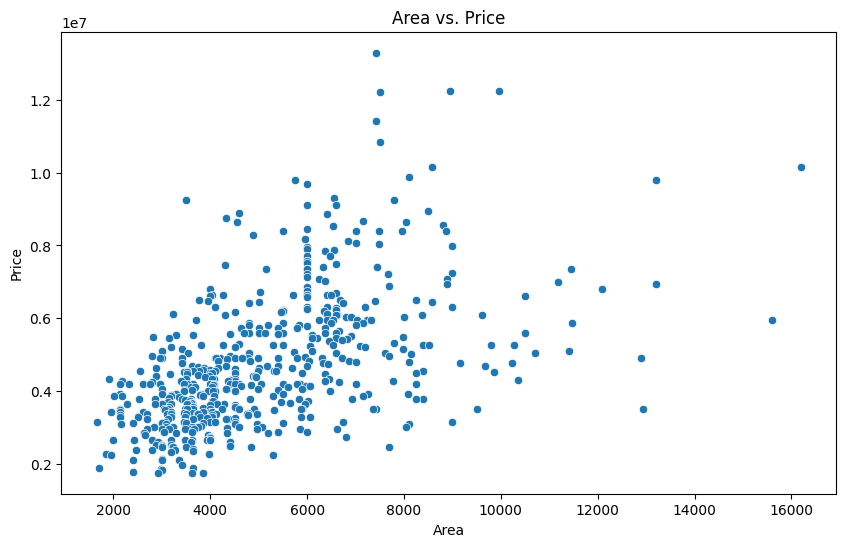

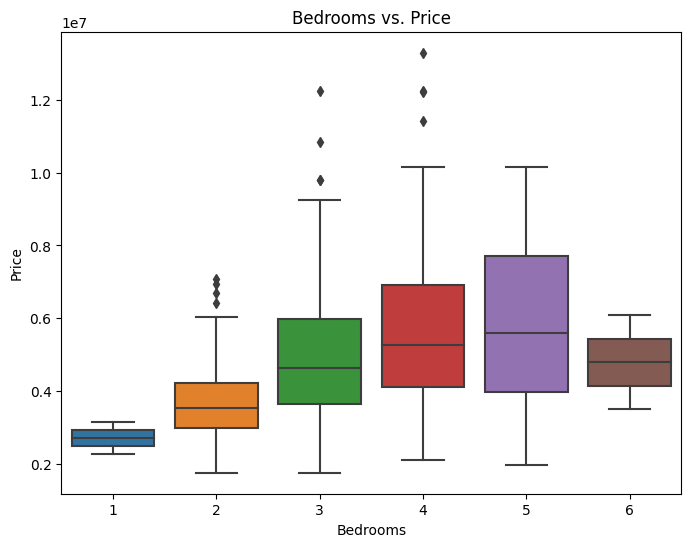

<ipython-input-17-783fc7a549ee>:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


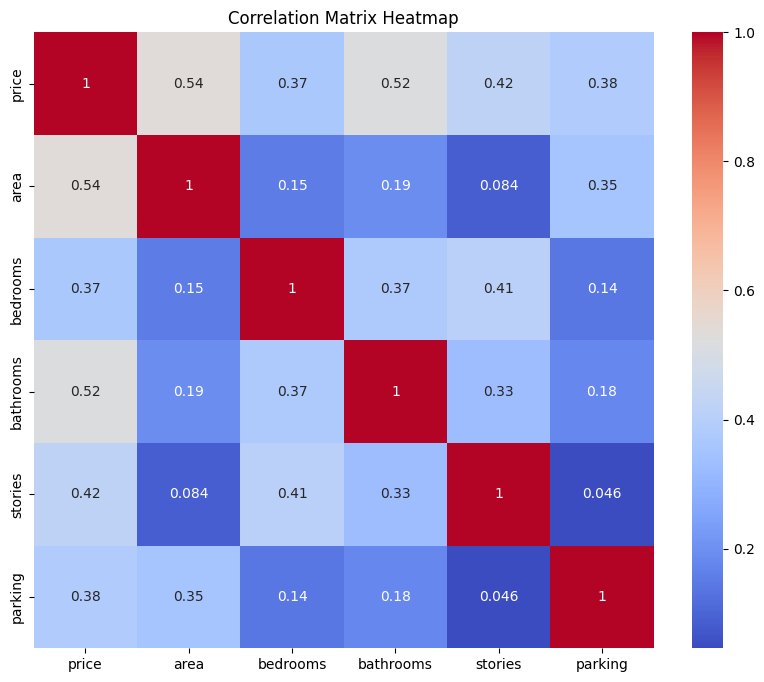

<Figure size 1000x1000 with 0 Axes>

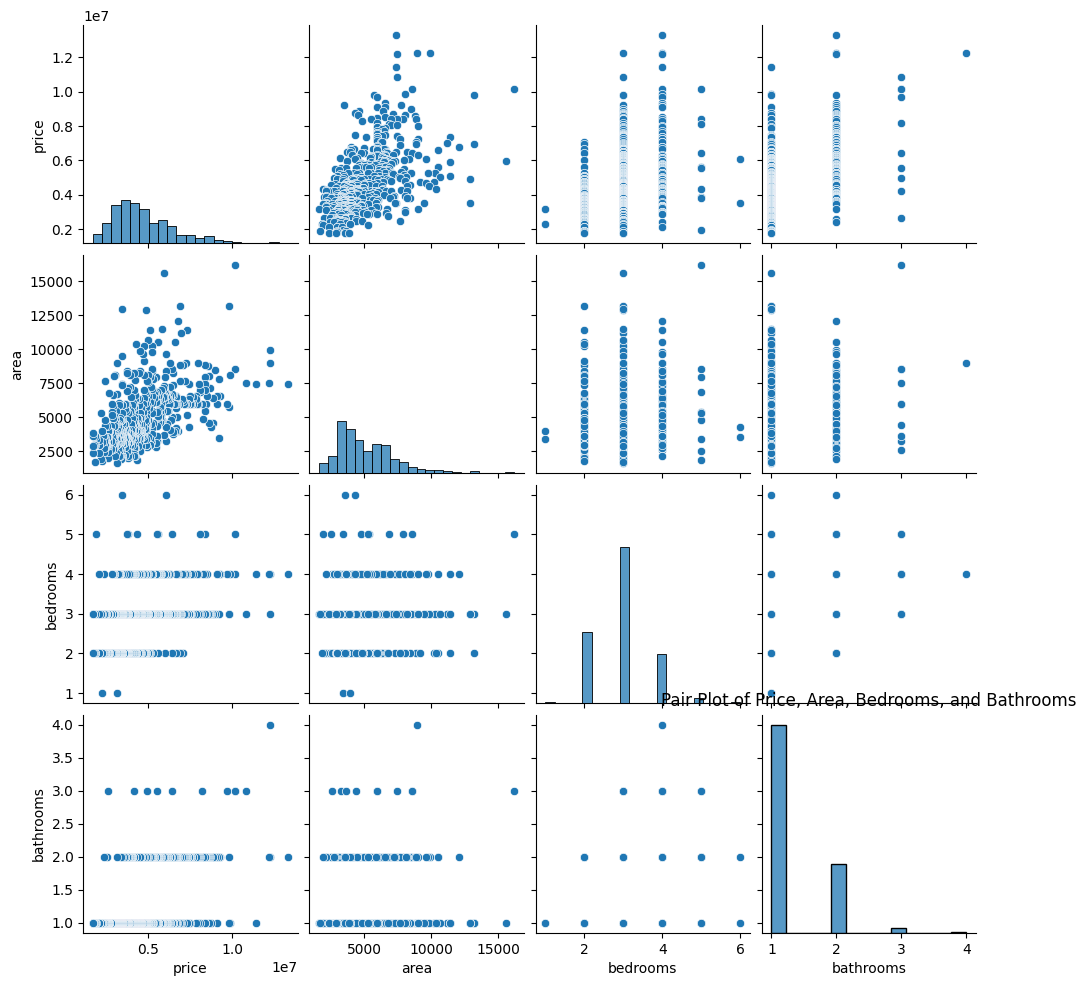

In [17]:
#Perform Below Visualizations.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('"C:\Users\Satyavarssheni\Desktop\Housing.csv"')

# Univariate Analysis

# Histogram for the 'Price' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()

# Count plot for 'Bedrooms' variable
plt.figure(figsize=(8, 6))
sns.countplot(data['bedrooms'])
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Count of Bedrooms')
plt.show()


# Bivariate Analysis

# Scatter plot of 'Area' vs. 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='area', y='price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.show()

# Box plot of 'Bedrooms' vs. 'Price'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bedrooms'], y=data['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price')
plt.show()


# Multivariate Analysis

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pair plot for selected variables
plt.figure(figsize=(10, 10))
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms']])
plt.title('Pair Plot of Price, Area, Bedrooms, and Bathrooms')
plt.show()


In [13]:
#Perform descriptive statistics on the dataset.
descriptive_stats = data.describe()

# Step 3: Print the descriptive statistics
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [14]:
#Check for Missing values and deal with them.
missing_values = data.isnull().sum()
print(missing_values)

# Step 3: Deal with missing values
# Option 1: Remove rows with missing values
data_without_missing = data.dropna()
print("Dataset without missing values:")
print(data_without_missing)

# Option 2: Fill missing values with a specific value (e.g., mean, median, mode)
# Fill missing values in numerical columns with the mean
data_filled_mean = data.fillna(data.mean())
print("Dataset with missing values filled with mean:")
print(data_filled_mean)

# Fill missing values in categorical columns with the mode
data_filled_mode = data.fillna(data.mode().iloc[0])
print("Dataset with missing values filled with mode:")
print(data_filled_mode)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64
Dataset without missing values:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1   

<ipython-input-14-8d089de2012f>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled_mean = data.fillna(data.mean())


In [18]:
#Find the outliers and replace them outliers
def find_replace_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Step 3: Identify and replace outliers in specific columns
outliers_price = find_replace_outliers(data['price'])
data.loc[outliers_price, 'price'] = data['price'].median()

outliers_area = find_replace_outliers(data['area'])
data.loc[outliers_area, 'area'] = data['area'].median()

# Step 4: Print the modified dataset after replacing outliers
print(data)

       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    4340000  7420         4          2        3      yes        no       no   
1    4340000  8960         4          4        4      yes        no       no   
2    4340000  9960         3          2        2      yes        no      yes   
3    4340000  7500         4          2        2      yes        no      yes   
4    4340000  7420         4          1        2      yes       yes      yes   
..       ...   ...       ...        ...      ...      ...       ...      ...   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  pa

In [19]:
#Check for Categorical columns and perform encoding.
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_columns)

# Step 3: Perform encoding

# Option 1: Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Option 2: One-Hot Encoding
# Uncomment the code below to perform one-hot encoding
'''
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Step 4: Print the modified dataset after encoding
print(one_hot_encoded_data)
'''
# Note: Uncomment the code above if you choose to perform one-hot encoding

# Step 4: Print the modified dataset after encoding
print(data)

Categorical columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')
       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    4340000  7420         4          2        3         1          0   
1    4340000  8960         4          4        4         1          0   
2    4340000  9960         3          2        2         1          0   
3    4340000  7500         4          2        2         1          0   
4    4340000  7420         4          1        2         1          1   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1     

In [21]:
#Split the data into dependent and independent variables.
X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Print the independent and dependent variables
print("Independent variables (X):")
print(X.head())
print("\nDependent variable (y):")
print(y.head())

Independent variables (X):
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  furnishingstatus  
0                0                1        2                 0  
1                0                1        3                 0  
2                0                0        2                 1  
3                0                1        3                 0  
4                0                1        2                 0  

Dependent variable (y):
0    4340000
1    4340000
2    4340000
3    4340000
4    4340000
Name: price, dtype: int64


In [25]:
#Scale the independent variables
from sklearn.preprocessing import StandardScaler

X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Print the scaled independent variables
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
print(scaled_data.head())

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.334706  1.403419   1.421812  1.378217  0.405623  -0.465315 -0.734539   
1  2.174467  1.403419   5.405809  2.532024  0.405623  -0.465315 -0.734539   
2  2.719766  0.047278   1.421812  0.224410  0.405623  -0.465315  1.361397   
3  1.378330  1.403419   1.421812  0.224410  0.405623  -0.465315  1.361397   
4  1.334706  1.403419  -0.570187  0.224410  0.405623   2.149083  1.361397   

   hotwaterheating  airconditioning   parking  furnishingstatus  
0        -0.219265         1.472618  1.517692         -1.406286  
1        -0.219265         1.472618  2.679409         -1.406286  
2        -0.219265        -0.679063  1.517692         -0.091662  
3        -0.219265         1.472618  2.679409         -1.406286  
4        -0.219265         1.472618  1.517692         -1.406286  


In [27]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Print the shape of the training and testing sets
print("Training set shape:")
print(X_train.shape, y_train.shape)
print("Testing set shape:")
print(X_test.shape, y_test.shape)

Training set shape:
(436, 11) (436,)
Testing set shape:
(109, 11) (109,)


In [29]:
#Build the Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1571247448158.1348


In [31]:
#Train the Model
X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the model on the training set
train_score = model.score(X_train, y_train)
print("Training set score:", train_score)

# Step 6: Evaluate the model on the testing set
test_score = model.score(X_test, y_test)
print("Testing set score:", test_score)

Training set score: 0.5881660874414099
Testing set score: 0.4718415003458525


In [33]:
#Test the Model
X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1571247448158.1348


In [34]:
#Measure the performance using Metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Step 2: Split the data into dependent and independent variables
X = data.drop('price', axis=1)  # Independent variables (all columns except 'Price')
y = data['price']  # Dependent variable ('Price')

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2) Score:", r2)

Mean Squared Error (MSE): 1571247448158.1348
Root Mean Squared Error (RMSE): 1253494.0957811228
Mean Absolute Error (MAE): 973270.4550101021
R-squared (R^2) Score: 0.4718415003458525
